# Normality Check

An important decision point when working with a sample of data is whether to use parametric or nonparametric statistical methods.

Parametric statistical methods assume that the data has a known and specific distribution, often a Gaussian distribution. If a data sample is not Gaussian, then the assumptions of parametric statistical tests are violated and nonparametric statistical methods must be used.

There are a range of techniques that you can use to check if your data sample deviates from a Gaussian distribution, called normality tests.



## Load Data and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from scipy.stats.stats import pearsonr
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.special import inv_boxcox
from math import sqrt

In [2]:
train = pd.read_csv("data/train.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# to make this notebook's output stable across runs
np.random.seed(42)
random_state = 42

### Sample out only numeric columns for simplicity

In [5]:
train = train[['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'SalePrice']]

In [6]:
train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,SalePrice
0,1,60,8450,7,5,2003,208500
1,2,20,9600,6,8,1976,181500
2,3,60,11250,7,5,2002,223500
3,4,70,9550,7,5,1970,140000
4,5,60,14260,8,5,2000,250000
5,6,50,14115,5,5,1995,143000
6,7,20,10084,8,5,2005,307000
7,8,60,10382,7,6,1973,200000
8,9,50,6120,7,5,1950,129900
9,10,190,7420,5,6,1950,118000


## Split Train & Test data

In [7]:
train_set, test_set = train_test_split(train, test_size=0.2, random_state=random_state)

## Check for normality of test/target variable

In statistics, __normality__ tests are used to determine if a data set is well-modeled by a normal distribution and to compute how likely it is for a random variable underlying the data set to be normally distributed.

__Skewness__ is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. Skewness in a data series may sometimes be observed not only graphically but by simple inspection of the values. For instance, consider the numeric sequence (49, 50, 51), whose values are evenly distributed around a central value of 50. We can transform this sequence into a negatively skewed distribution by adding a value far below the mean, e.g. (40, 49, 50, 51). Similarly, we can make the sequence positively skewed by adding a value far above the mean, e.g. (49, 50, 51, 60). __Lesser the skewness, more normally distributed the dataset is.__

__Kurtosis__ is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.


 mu = 181441.54 and sigma = 77230.50



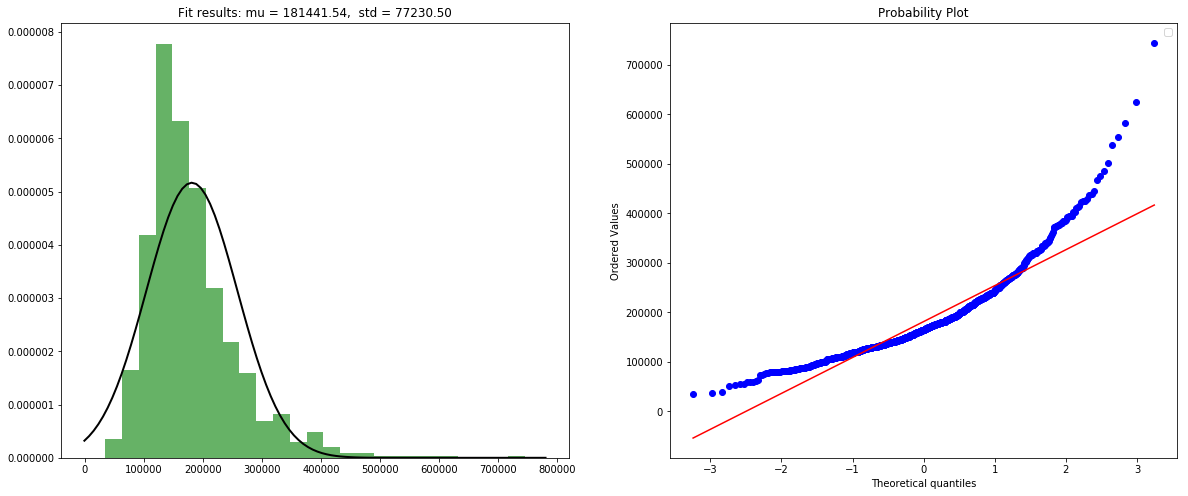

Skewness: 1.743129
Kurtosis: 5.475315


In [8]:
data = train_set['SalePrice']
# Fit a normal distribution to the data:
mu, std = norm.fit(data)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,8)

''' 
An informal approach to testing normality 
is to compare a histogram of the sample data to a normal probability curve.
'''
ax1.hist(data, bins=25, density=True, alpha=0.6, color='g')
# Plot the PDF.
xmin, xmax = ax1.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax1.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
ax1.set_title(title)


'''
A better way to visualize test for normality is Normal probability plot
In a normal probability plot (also called a "normal plot"), the sorted data are plotted 
vs. values selected to make the resulting image look close to a straight line if the data 
are approximately normally distributed. Deviations from a straight line suggest departures from normality. 
'''
(mu, sigma) = norm.fit(train_set['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
ax2.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
ax2.set_ylabel('Frequency')
ax2.set_title('SalePrice distribution')
stats.probplot(train_set['SalePrice'], plot=ax2)

plt.show()


print("Skewness: %f" % train_set['SalePrice'].skew())
print("Kurtosis: %f" % train_set['SalePrice'].kurt())

__Observations :__
-  Looks like a normal distribution? Not quite! Looking at the kurtosis score, we can see that there is a very nice peak. However, looking at the skewness score, we can see that the sale prices deviate from the normal distribution.
-  Both the value of Skewness & Kurtosis are high, it doesn't represent a normal distribution. For normal distribution, the Skewness is below 1 & Kurtosis below 3.

__The above test are visual test for normality, Below are few more test that can be done to test for normal distribution:- __

1. D'Agostino's K-squared test,
2. Jarque–Bera test,
3. Anderson–Darling test,
4. Cramér–von Mises criterion,
5. Lilliefors test,
6. Kolmogorov–Smirnov test,
7. __Shapiro–Wilk test :__  The Shapiro-Wilk test, proposed in 1965, calculates a W statistic that tests whether a random sample, x1,x2,…,xn comes from (specifically) a normal distribution . Small values of W are evidence of departure from normality

8. Pearson's chi-squared test
9. __Anderson–Darling__ : The Anderson–Darling test is a statistical test of whether a given sample of data is drawn from a given probability distribution. When applied to testing whether a normal distribution adequately describes a set of data, it is one of the most powerful statistical tools for detecting most departures from normality. _If the returned statistic is larger than these critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution can be rejected. The returned statistic is referred to as ‘A2’ in the references._

In [9]:
#Shapiro–Wilk test
stats.shapiro(train_set['SalePrice'])

(0.8810798525810242, 5.497511655767464e-29)

In [10]:
#Anderson–Darling test
stats.anderson(train_set['SalePrice'], dist='norm')

AndersonResult(statistic=31.358053701054814, critical_values=array([0.574, 0.654, 0.784, 0.915, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

__Observation :__

-  When you perform a hypothesis test in statistics, a p-value helps you determine the significance of your results. Hypothesis tests are used to test the validity of a claim that is made about a population. This claim that’s on trial, in essence, is called the null hypothesis. The alternative hypothesis is the one you would believe if the null hypothesis is concluded to be untrue.
    -  A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.
    -  A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.
-  Based on the p value from Shapiro–Wilk test (3.206247534576162e-33), the null hypothesis is rejected as 3.206247534576162e-33 not greater than 0.5. This data doesn't belong from a normal distribution.
-  Based on the test statistics of Anderson–Darling test, we can see that the statistic is way more than the critical_values for any significance_level, so the hypotheis is rejected. The data set is not from normal distribution.

__The data is not derived from a normal distribution based on the target variable, we will check if the error follows a normal distribution or not ?__

## Validate if the Error follows a normal distribution

### Fit a model

In [11]:
housing_X_train = train_set.iloc[:,:-1]
housing_y_train = train_set.iloc[:,-1:]

housing_X_test = test_set.iloc[:,:-1]
housing_y_test = test_set.iloc[:,-1:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(housing_X_train, housing_y_train)

# Make predictions using the testing set
housing_y_pred = regr.predict(housing_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The root mean squared error
print("Root Mean squared error: %.2f"% sqrt(mean_squared_error(housing_y_test, housing_y_pred)))

df_error = housing_y_test.copy()
df_error["pred_SalePrice"] = housing_y_pred
df_error["error"] = df_error["SalePrice"] - df_error["pred_SalePrice"]
df_error

Coefficients: 
 [[ 7.82122990e-01 -1.70428797e+02  1.30896627e+00  3.91918237e+04
  -1.83717684e+03  5.10684389e+02]]
Root Mean squared error: 49473.32


,SalePrice,pred_SalePrice,error
892,154500,184912.570577,-30412.570577
1105,325000,263100.762081,61899.237919
413,115000,120964.598639,-5964.598639
522,159000,149812.414538,9187.585462
1036,315500,316535.024575,-1035.024575
614,75500,57824.049596,17675.950404
218,311500,227644.025379,83855.974621
1160,146000,145977.369636,22.630364
649,84500,57412.545112,27087.454888
887,135500,128468.094916,7031.905084


__The error also doesn't follow a normal distribution__
-  The Screwness is more than 1
-  Kurtosis is more than 3, i.e has a very long tail.


 mu = 2927.79 and sigma = 49386.61



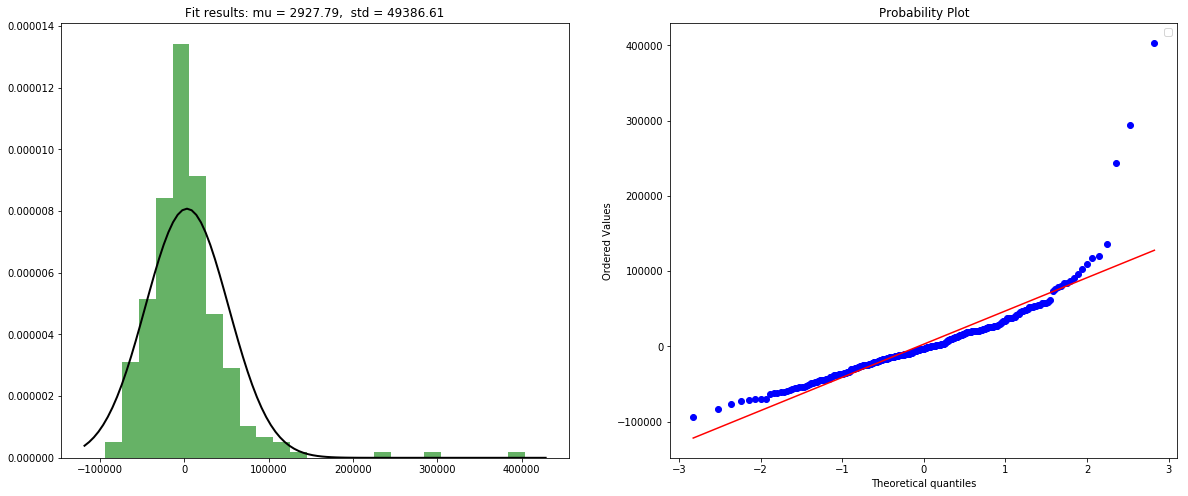

Skewness: 3.079219
Kurtosis: 19.478240


In [12]:
data = df_error['error']
# Fit a normal distribution to the data:
mu, std = norm.fit(data)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,8)

''' 
An informal approach to testing normality 
is to compare a histogram of the sample data to a normal probability curve.
'''
ax1.hist(data, bins=25, density=True, alpha=0.6, color='g')
# Plot the PDF.
xmin, xmax = ax1.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax1.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
ax1.set_title(title)



'''
A better way to visualize test for normality is Normal probability plot
In a normal probability plot (also called a "normal plot"), the sorted data are plotted 
vs. values selected to make the resulting image look close to a straight line if the data 
are approximately normally distributed. Deviations from a straight line suggest departures from normality. 
'''
(mu, sigma) = norm.fit(df_error['error'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
ax2.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
ax2.set_ylabel('Frequency')
ax2.set_title('SalePrice distribution')
stats.probplot(df_error['error'], plot=ax2)

plt.show()


print("Skewness: %f" % df_error['error'].skew())
print("Kurtosis: %f" % df_error['error'].kurt())

## Next step after deciding normality of data?

As the error distribution is also not normal, we can state that the dataset in not from a normal distribution.
So we need to convert the dataset into normal distribution.

We start with converting the target variable into normal form

### Convert the dataset into normal distribution

In [13]:
salePrice_transformed,lambda_boxcox = stats.boxcox(train_set['SalePrice'])

train_set_transformed = train_set.copy()
train_set_transformed["salePrice_transformed"] = salePrice_transformed
train_set_transformed

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,SalePrice,salePrice_transformed
254,255,20,8400,5,6,1957,145000,7.531007
1066,1067,60,7837,6,7,1994,178000,7.606241
638,639,30,8777,5,7,1950,85000,7.328885
799,800,50,7200,5,7,1950,175000,7.600053
380,381,50,5000,5,6,1950,127000,7.481685
303,304,20,9800,5,7,1972,149900,7.543289
86,87,60,11911,6,5,2005,174000,7.597965
1385,1386,50,5436,4,8,2007,125500,7.477237
265,266,20,12090,6,6,1981,175500,7.601093
793,794,20,9158,8,5,2007,225000,7.690647


Now check if the dataset is converted to normal distribution.


 mu = 7.58 and sigma = 0.14



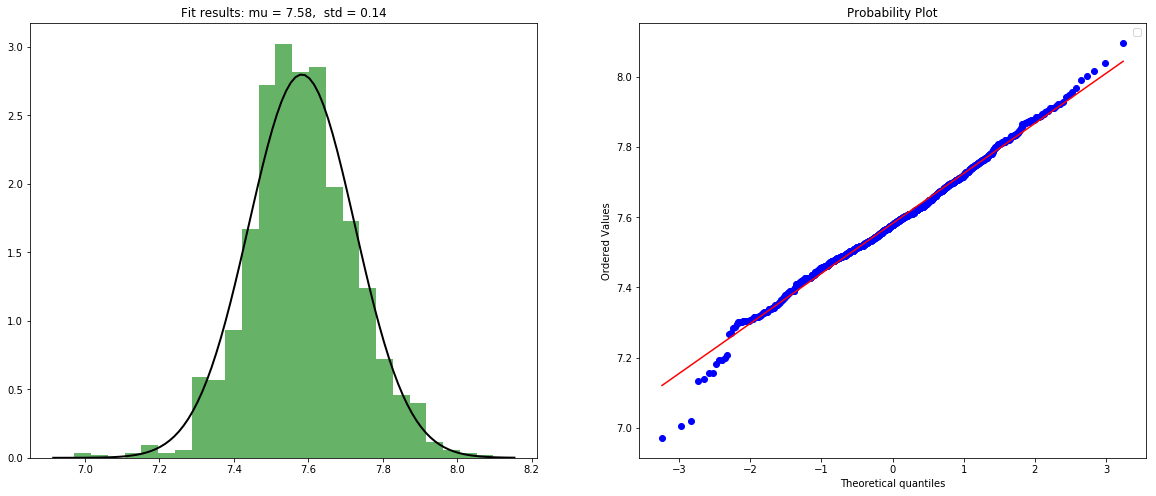

Skewness: -0.008051
Kurtosis: 0.776059


In [14]:
data = train_set_transformed['salePrice_transformed']
# Fit a normal distribution to the data:
mu, std = norm.fit(data)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,8)

''' 
An informal approach to testing normality 
is to compare a histogram of the sample data to a normal probability curve.
'''
ax1.hist(data, bins=25, density=True, alpha=0.6, color='g')
# Plot the PDF.
xmin, xmax = ax1.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax1.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
ax1.set_title(title)


'''
A better way to visualize test for normality is Normal probability plot
In a normal probability plot (also called a "normal plot"), the sorted data are plotted 
vs. values selected to make the resulting image look close to a straight line if the data 
are approximately normally distributed. Deviations from a straight line suggest departures from normality. 
'''
(mu, sigma) = norm.fit(train_set_transformed['salePrice_transformed'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
ax2.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
ax2.set_ylabel('Frequency')
ax2.set_title('SalePrice distribution')
stats.probplot(train_set_transformed['salePrice_transformed'], plot=ax2)

plt.show()


print("Skewness: %f" % train_set_transformed['salePrice_transformed'].skew())
print("Kurtosis: %f" % train_set_transformed['salePrice_transformed'].kurt())

The Skewness & Kurtosis are significantly low now and well within normal distribution range.

## Fit the model

In [15]:
housing_X_train = train_set_transformed.iloc[:,:-2]
housing_y_train = train_set_transformed.iloc[:,-1:]

housing_X_test = test_set.iloc[:,:-1]
housing_y_test = test_set.iloc[:,-1:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(housing_X_train, housing_y_train)

# Make predictions using the testing set
housing_y_pred = regr.predict(housing_X_test)

#Convert to actual value
housing_y_pred_actual = inv_boxcox(housing_y_pred, lambda_boxcox)


# The coefficients
print('Coefficients: \n', regr.coef_)
# The root mean squared error
print("Root Mean squared error: %.2f"% sqrt(mean_squared_error(housing_y_test, housing_y_pred_actual)))


Coefficients: 
 [[ 3.14606145e-06 -2.83528433e-04  2.28638811e-06  7.18211281e-02
   1.90135984e-03  1.32355732e-03]]
Root Mean squared error: 45580.28


The RMSE have reduced after converting the target variable to normal form, hence shows improvement.

# Reference

https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/